# Trigonometrical method #
Tasks:
1. numerical analysis of mechanism
2. optimization of mechanism
3. control of mechanism
## Python Intro ##
Why Python -> it is free!
- libraries
- variables, numbers, lists ...
- flow control
- function definition
- plotting

## Libraries ##
- use the available useful functions
- the functions are gather in the libraries
- the libraries are usually open-source projects
- you can download them directly (from Git etc.) or using pip (https://pypi.org/project/pip/)

In [42]:
# The Python Standard Libraries                 https://docs.python.org/3/library/index.html
# - standard built-in, without installation 
import math

# Basic library for numerical calculation       https://numpy.org/doc/stable/user/quickstart.html
# - Numpy vs. Matlab                            https://numpy.org/doc/stable/user/numpy-for-matlab-users.html
import numpy

# Basic library for plotting                    https://matplotlib.org/
from matplotlib import pyplot as plt

## Variables, Numbers, Lists ... ##
- you can easily define necessary variables
- the variables are usually defined without data type definition (boolean, int, string ... ) - all types are objects

In [43]:
a = 0.1 # [m]
b = 0.5 # [m]
c = 0.3 # [m]

angle_fi_1_s = 0 # [rad]
angle_fi_1_e = 2*math.pi # [rad], pi is defined in the library math as constant
angle_fi_1_num_division = 100 # number of sections between the angle_fi_0 and the angle_fi_1

# using function from the imported library numpy 
# each function has specified parameters
angles_fi_1 = numpy.linspace(angle_fi_1_s, angle_fi_1_e, angle_fi_1_num_division) # get list of angles between the angle_fi_0 and the angle_fi_1

# basic printing function - print()
# parameter can be a functional string - f'' 
print(f'List of angles: {angles_fi_1} rad')

List of angles: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.5

## Programme flow control ##
- the standard flow control tools are defined in Python https://docs.python.org/3/tutorial/controlflow.html
- programme blocks are defined by indentation

In [44]:
# empty list of coordinates defition
x_B = []
y_B = []

for phi_1 in angles_fi_1:
    # calculate defined values
    dis_AS2 = math.sqrt((a*math.cos(phi_1)-c)**2 + (a * math.sin(phi_1))**2)
    dis_BS2 = b - dis_AS2
    phi_2 = math.atan(a * math.sin(phi_1) / (c - a * math.cos(phi_1)))

    # append new values to existing lists
    x_B.append(dis_BS2 * math.cos(-phi_2) + c)
    y_B.append(dis_BS2 * math.sin(-phi_2))


## Function definition and Plotting ##
- you can easily define own functions -> do it!
- decompose your code into function blocks
- add description of your function into the code
- describe inputs and outputs of the function

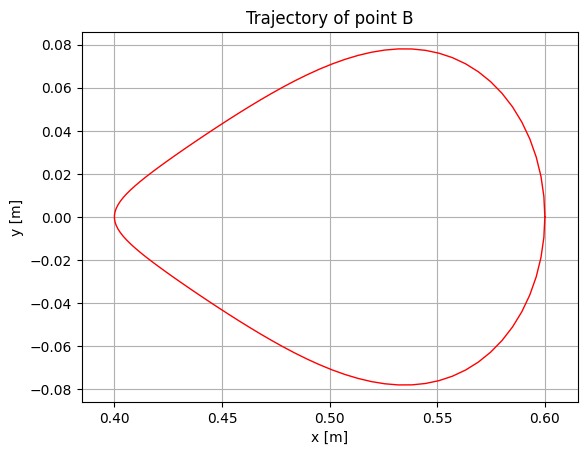

In [45]:
def make_2D_graph(x, y, x_name, y_name, title):
    """
    Funtion plots the data [x, y] into 2D graph.

    param x: x data
    type  x: int
    param y: y data
    type  y: int
    param x_name: name of the x axis
    param x_name: str
    param y_name: name of the y axis
    param y_name: str
    param title: title of the graph
    param title: str
    """
    plt.figure(1, dpi=100)
    ax = plt.axes()
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(title)
    # plot line - parameters https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ax.plot(x, y, 'r', linewidth=1)
    ax.grid(True)
    ax.axis('equal')

# example of usage the defined function
# plot the trajectory of point B[x_B, y_B]
make_2D_graph(x_B, y_B, 'x [m]', 'y [m]', 'Trajectory of point B')

## Animation ##
- you can easily make an animation based on model

MovieWriter ffmpeg unavailable; using Pillow instead.


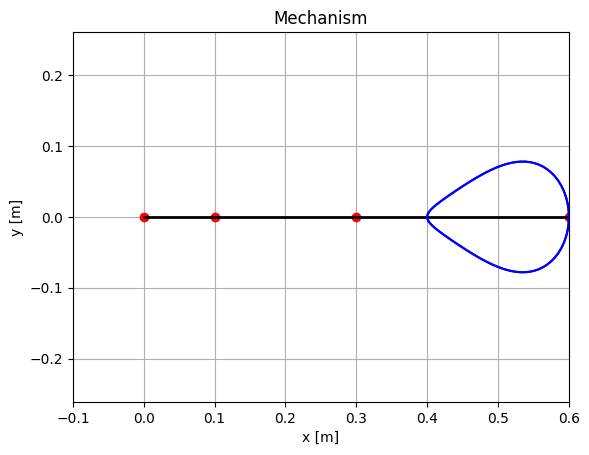

In [46]:
# Animation of the mechanism
from matplotlib.animation import FuncAnimation
# init figure
fig, ax = plt.subplots()

# create dict of lines and points
objects = {
    'point_A' : {
        'label': 'A',
        'style': 'ro',
        'x': a,
        'y': 0,
        'point': True,
        'obj': None,
    },
    'point_B' : {
        'label': 'A',
        'style': 'ro',
        'x': a + b,
        'y': 0,
        'point': True,
        'obj': None,
    },
    'point_S1' : {
        'label': '$S_1$',
        'style': 'ro',
        'x': 0,
        'y': 0,
        'point': True,
        'obj': None,
    },
    'point_S2' : {
        'label': '$S_2$',
        'style': 'ro',
        'x': c,
        'y': 0,
        'point': True,
        'obj': None,
    },
    'line_S1A' : {
        'style': 'k',
        'x': [0, a],
        'y': [0, 0],
        'point': False,
        'obj': None,
    },
    'line_AB' : {
        'style': 'k',
        'x': [a, a + b],
        'y': [0, 0],
        'point': False,
        'obj': None,
    },
}

# create graphic objects
for object in objects:
    objects[object]['obj'] = ax.plot(objects[object]['x'], objects[object]['y'], objects[object]['style'], linewidth=2)

def init():
    """
    Function is called before update().
    """
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_title('Mechanism')
    ax.plot(x_B, y_B, 'b')
    ax.grid(True)
    ax.axis('equal')
    ax.set_xlim(-a, a+b)
    ax.set_ylim(-b, b)

    return [objects[object]['obj'][0] for object in objects]

def update(frame):
    """
    Function generates each frame in the animation.
    """
    objects['point_A']['x'] = a * math.cos(angles_fi_1[frame])
    objects['point_A']['y'] = a * math.sin(angles_fi_1[frame])

    objects['point_B']['x'] = x_B[frame]
    objects['point_B']['y'] = y_B[frame]

    objects['line_S1A']['x'] = [0, objects['point_A']['x']]
    objects['line_S1A']['y'] = [0, objects['point_A']['y']]

    objects['line_AB']['x'] = [objects['point_A']['x'], objects['point_B']['x']]
    objects['line_AB']['y'] = [objects['point_A']['y'], objects['point_B']['y']]

    for object in objects:
        objects[object]['obj'][0].set_data(objects[object]['x'], objects[object]['y'])

    return [objects[object]['obj'][0] for object in objects]

# object generates animation
# def of number of frames and FPS
animation = FuncAnimation(fig, update, frames=range(len(angles_fi_1)), init_func=init, blit=True)

# save the animation into .gif
animation.save('motion.gif', fps=15)
plt.show()

## Example of optimization ##
- we can define ideal trajectory of the point B
- we can find optimized values of parameters a, b
- brute force algorithm is used

In [47]:
# definition of the ideal trajectory -> circle, S = [0.5, 0] m, R = 0.1 m
R = 0.1 # [m]
S = [0.5, 0] # [m]
x_S = []
y_S = []
for angle_fi_1 in angles_fi_1:
    x_S.append(S[0] + R * math.cos(angle_fi_1))
    y_S.append(S[1] + R * math.sin(angle_fi_1))

# definition of values space
steps = 100
list_a = numpy.linspace(0.01, 0.2, steps)
list_b = numpy.linspace(0.4, 0.8, steps)
# c is constant

evaluations = numpy.zeros([len(list_a), len(list_b)], dtype=float)

# def the best solution
a_best = list_a[0]
b_best = list_b[0]
eval_best = 1e6

# for each combination of parameters a, b
for index_a, a in enumerate(list_a):
    for index_b, b in enumerate(list_b):
        # reset current eval
        comb_eval = 0
        # evaluate 
        for angle_fi_1 in angles_fi_1:
            # point S(phi_1)
            x_S = S[0] + R * math.cos(angle_fi_1)
            y_S = S[1] + R * math.sin(angle_fi_1)

            # point B(phi_1)
            dis_AS2 = math.sqrt((a*math.cos(angle_fi_1)-c)**2 + (a * math.sin(angle_fi_1))**2)
            dis_BS2 = b - dis_AS2
            phi_2 = math.atan(a * math.sin(angle_fi_1) / (c - a * math.cos(angle_fi_1)))

            x_B = dis_BS2 * math.cos(-phi_2) + c
            y_B = dis_BS2 * math.sin(-phi_2)

            # evaluate combination
            comb_eval += math.sqrt((x_S - x_B)**2 + (y_S - y_B)**2)

        # check solution
        if comb_eval < eval_best:
            a_best = a
            b_best = b
            eval_best = comb_eval
            print(f"Combination: a: {a:0.3f} m, b: {b:0.3f} m ... eval = {comb_eval:0.3f}! It looks like an optimal solution ...")

        # add the result of eval to the result matrix
        evaluations[index_a, index_b] = comb_eval


Combination: a: 0.010 m, b: 0.400 m ... eval = 12.775! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.404 m ... eval = 12.499! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.408 m ... eval = 12.237! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.412 m ... eval = 11.996! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.416 m ... eval = 11.779! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.420 m ... eval = 11.578! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.424 m ... eval = 11.391! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.428 m ... eval = 11.218! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.432 m ... eval = 11.056! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.436 m ... eval = 10.907! It looks like an optimal solution ...
Combination: a: 0.010 m, b: 0.440 m ... eval = 10.769! It looks like a

The best combination is: a: 0.046 m, b: 0.489 m ... eval = 9.570!


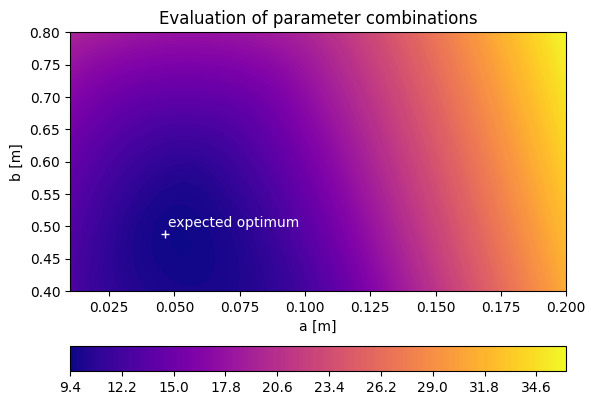

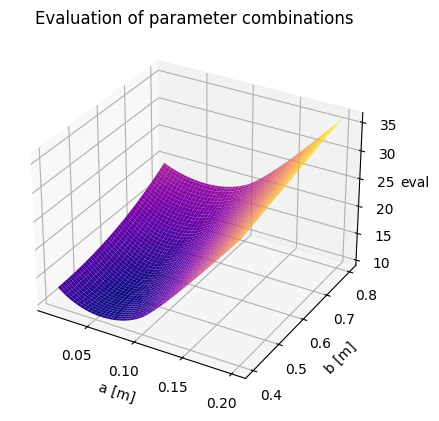

In [48]:
def plot_contourf(x, y, z, x_name, y_name, title, x_p, y_p, p_annotation):
    """
    Funtion plots the data [x, y] into 2D graph.

    param x: x data
    type  x: int
    param y: y data
    type  y: int
    param x_name: name of the x axis
    param x_name: str
    param y_name: name of the y axis
    param y_name: str
    param title: title of the graph
    param title: str
    param x_p: x data of the point
    type  x_p: int
    param y_p: y data of the point
    type  y_p: int
    param p_annotation: name of the point
    param p_annotation: str
    """
    plt.figure(dpi=100)
   
    ax = plt.axes()
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(title)
    
    im = ax.contourf(x, y, z, 150, cmap='plasma')
    ax.plot(x_p, y_p, '+w')
    ax.annotate(text=p_annotation, xy=[x_p, y_p], xytext=[x_p * 1.02, y_p * 1.02], color='white')

    plt.colorbar(im, orientation='horizontal', ticklocation='left')

def plot_surface(x, y, z, x_name, y_name, z_name, title):
    """
    Funtion plots the data [x, y] into 2D graph.

    param x: x data
    type  x: int
    param y: y data
    type  y: int
    param z: z data
    type  z: int
    param x_name: name of the x axis
    param x_name: str
    param y_name: name of the y axis
    param y_name: str
    param z_name: name of the y axis
    param z_name: str
    param title: title of the graph
    param title: str
    """
    plt.figure(dpi=100)
    ax = plt.axes(projection='3d')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)
    ax.set_title(title)
    ax.plot_surface(x, y, z, cmap='plasma')

# plot the result of the optimization
print(f"The best combination is: a: {a_best:0.3f} m, b: {b_best:0.3f} m ... eval = {eval_best:0.3f}!")

mat_a, mat_b = numpy.meshgrid(list_a, list_b)
plot_contourf(mat_a, mat_b, evaluations, 'a [m]', 'b [m]', 'Evaluation of parameter combinations', a_best, b_best, 'expected optimum')
plot_surface(mat_a, mat_b, evaluations, 'a [m]', 'b [m]', 'eval', 'Evaluation of parameter combinations')
